In [82]:
# import pandas library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [83]:
# read the online file by the URL provides above, and assign it to variable "df"
# path="https://archive.ics.uci.edu/ml/machine-learning-databases/autos/imports-85.data"
# df = pd.read_csv(path,header=None)  # No headings for this data 

In [84]:
df = pd.read_csv("data.csv",header=None)  # Load without headers

In [85]:
df.shape

(205, 26)

In [86]:
# create headers list
headers = ["symboling","normalized-losses","make","fuel-type","aspiration", "num-of-doors","body-style",
         "drive-wheels","engine-location","wheel-base", "length","width","height","curb-weight","engine-type",
         "num-of-cylinders", "engine-size","fuel-system","bore","stroke","compression-ratio","horsepower",
         "peak-rpm","city-mpg","highway-mpg","price"]

In [87]:
df.columns = headers
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [88]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  205 non-null    object 
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num-of-doors       205 non-null    object 
 6   body-style         205 non-null    object 
 7   drive-wheels       205 non-null    object 
 8   engine-location    205 non-null    object 
 9   wheel-base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb-weight        205 non-null    int64  
 14  engine-type        205 non-null    object 
 15  num-of-cylinders   205 non-null    object 
 16  engine-size        205 non

In [89]:
df.isna().sum()   # count null values in each column 

symboling            0
normalized-losses    0
make                 0
fuel-type            0
aspiration           0
num-of-doors         0
body-style           0
drive-wheels         0
engine-location      0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-type          0
num-of-cylinders     0
engine-size          0
fuel-system          0
bore                 0
stroke               0
compression-ratio    0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
dtype: int64

In [90]:
df.isin(['?']).sum()   # Number of ? in each column

symboling             0
normalized-losses    41
make                  0
fuel-type             0
aspiration            0
num-of-doors          2
body-style            0
drive-wheels          0
engine-location       0
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
engine-type           0
num-of-cylinders      0
engine-size           0
fuel-system           0
bore                  4
stroke                4
compression-ratio     0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 4
dtype: int64

### Remove rows with ? in  price 

In [91]:
df[df['price'] == '?']   # rows with ? in price

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
9,0,?,audi,gas,turbo,two,hatchback,4wd,front,99.5,...,131,mpfi,3.13,3.40,7.0,160,5500,16,22,?
44,1,?,isuzu,gas,std,two,sedan,fwd,front,94.5,...,90,2bbl,3.03,3.11,9.6,70,5400,38,43,?
45,0,?,isuzu,gas,std,four,sedan,fwd,front,94.5,...,90,2bbl,3.03,3.11,9.6,70,5400,38,43,?
129,1,?,porsche,gas,std,two,hatchback,rwd,front,98.4,...,203,mpfi,3.94,3.11,10.0,288,5750,17,28,?


In [92]:
# Drop rows with ? in price 
df.drop(df.loc[df['price'] == '?'].index, axis=0, inplace=True)

In [93]:
df.shape

(201, 26)

In [94]:
# Change type of price from object to float 
df['price'] = df['price'].astype('float')

### Check features that are important

In [95]:
features = ['symboling','wheel-base','length','width','height','compression-ratio',
           'curb-weight','engine-size','city-mpg','highway-mpg','price']

In [96]:
cm = df[features].corr()
cm

,symboling,wheel-base,length,width,height,compression-ratio,curb-weight,engine-size,city-mpg,highway-mpg,price
symboling,1.000000,-0.535987,-0.365404,-0.242423,-0.550160,-0.182196,-0.233118,-0.110581,-0.035527,0.036233,-0.082391
wheel-base,-0.535987,1.000000,0.876024,0.814507,0.590742,0.250313,0.782097,0.572027,-0.470606,-0.543304,0.584642
length,-0.365404,0.876024,1.000000,0.857170,0.492063,0.159733,0.880665,0.685025,-0.665192,-0.698142,0.690628
width,-0.242423,0.814507,0.857170,1.000000,0.306002,0.189867,0.866201,0.729436,-0.633531,-0.680635,0.751265
height,-0.550160,0.590742,0.492063,0.306002,1.000000,0.259737,0.307581,0.074694,-0.049800,-0.104812,0.135486
compression-ratio,-0.182196,0.250313,0.159733,0.189867,0.259737,1.000000,0.156433,0.028889,0.331425,0.268465,0.071107
curb-weight,-0.233118,0.782097,0.880665,0.866201,0.307581,0.156433,1.000000,0.849072,-0.749543,-0.794889,0.834415
engine-size,-0.110581,0.572027,0.685025,0.729436,0.074694,0.028889,0.849072,1.000000,-0.650546,-0.679571,0.872335
city-mpg,-0.035527,-0.470606,-0.665192,-0.633531,-0.049800,0.331425,-0.749543,-0.650546,1.000000,0.972044,-0.686571
highway-mpg,0.036233,-0.543304,-0.698142,-0.680635,-0.104812,0.268465,-0.794889,-0.679571,0.972044,1.000000,-0.704692


In [97]:
cm['price']

symboling           -0.082391
wheel-base           0.584642
length               0.690628
width                0.751265
height               0.135486
compression-ratio    0.071107
curb-weight          0.834415
engine-size          0.872335
city-mpg            -0.686571
highway-mpg         -0.704692
price                1.000000
Name: price, dtype: float64

In [98]:
# pick up only required fields 
features = ['make','fuel-type','num-of-doors','body-style','drive-wheels','length','width','curb-weight',
            'engine-size','horsepower','city-mpg','highway-mpg','price']
cars = df.loc[: , features]

In [99]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 201 entries, 0 to 204
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   make          201 non-null    object 
 1   fuel-type     201 non-null    object 
 2   num-of-doors  201 non-null    object 
 3   body-style    201 non-null    object 
 4   drive-wheels  201 non-null    object 
 5   length        201 non-null    float64
 6   width         201 non-null    float64
 7   curb-weight   201 non-null    int64  
 8   engine-size   201 non-null    int64  
 9   horsepower    201 non-null    object 
 10  city-mpg      201 non-null    int64  
 11  highway-mpg   201 non-null    int64  
 12  price         201 non-null    float64
dtypes: float64(3), int64(4), object(6)
memory usage: 22.0+ KB


## Univariate Analysis

### Price

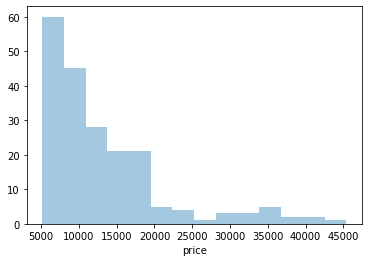

In [100]:
sns.distplot(cars['price'], kde=False)

In [101]:
cars['price'].describe()

count      201.000000
mean     13207.129353
std       7947.066342
min       5118.000000
25%       7775.000000
50%      10295.000000
75%      16500.000000
max      45400.000000
Name: price, dtype: float64

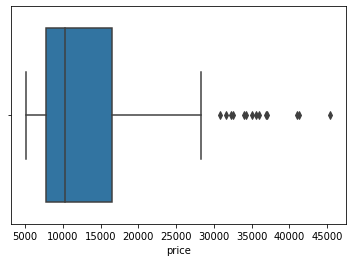

In [102]:
sns.boxplot(cars['price'])

### fuel-type

In [103]:
cars['fuel-type'].value_counts()

gas       181
diesel     20
Name: fuel-type, dtype: int64

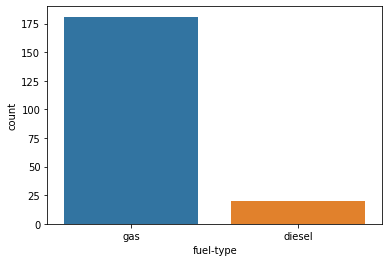

In [104]:
sns.countplot(cars['fuel-type'])

In [105]:
cars.groupby('fuel-type')['price'].mean()

fuel-type
diesel    15838.15000
gas       12916.40884
Name: price, dtype: float64

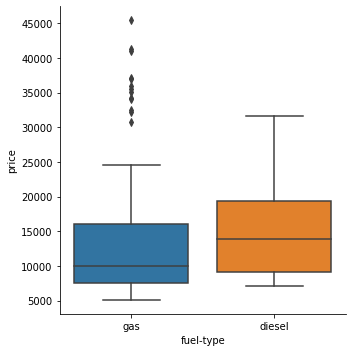

In [106]:
sns.catplot(x='fuel-type',y="price", data=cars, kind='box')

### make

In [107]:
cars['make'].unique().size

22

In [108]:
cars['make'].value_counts()

toyota           32
nissan           18
mazda            17
mitsubishi       13
honda            13
subaru           12
volkswagen       12
peugot           11
volvo            11
dodge             9
bmw               8
mercedes-benz     8
plymouth          7
audi              6
saab              6
porsche           4
jaguar            3
alfa-romero       3
chevrolet         3
renault           2
isuzu             2
mercury           1
Name: make, dtype: int64

In [109]:
cars.groupby('make')['price'].mean().sort_values(ascending=False)

make
jaguar           34600.000000
mercedes-benz    33647.000000
porsche          31400.500000
bmw              26118.750000
volvo            18063.181818
audi             17859.166667
mercury          16503.000000
alfa-romero      15498.333333
peugot           15489.090909
saab             15223.333333
mazda            10652.882353
nissan           10415.666667
volkswagen       10077.500000
toyota            9885.812500
renault           9595.000000
mitsubishi        9239.769231
isuzu             8916.500000
subaru            8541.250000
honda             8184.692308
plymouth          7963.428571
dodge             7875.444444
chevrolet         6007.000000
Name: price, dtype: float64

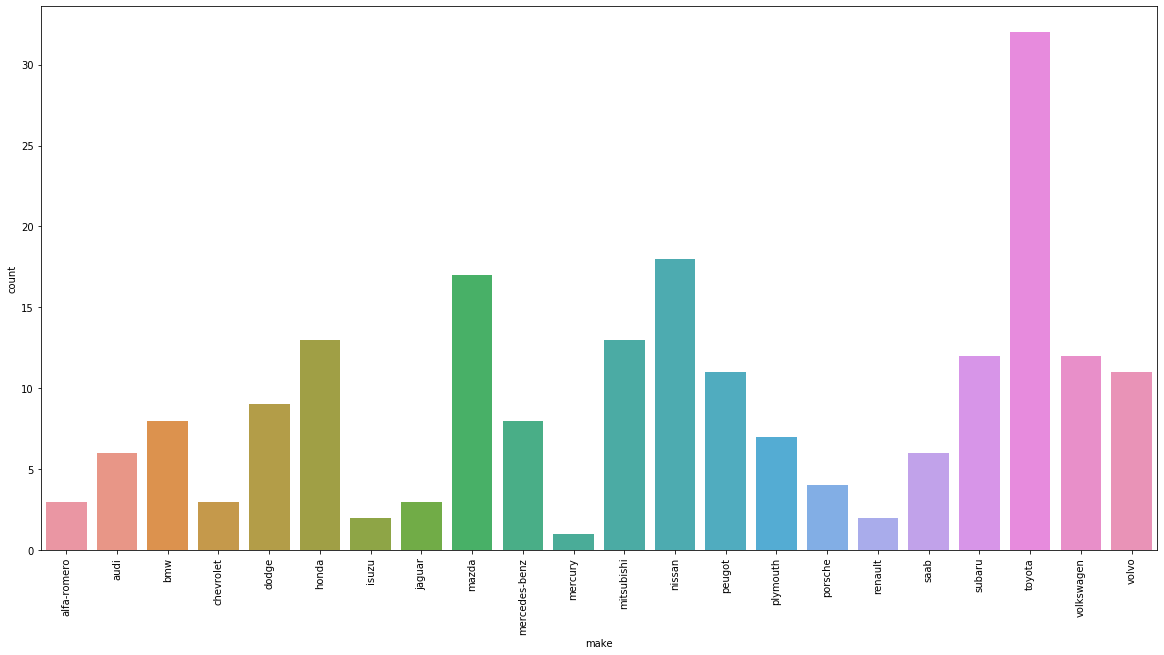

In [110]:
# Understand distribution of make
plt.gcf().set_size_inches(20,10)
plt.xticks(rotation='vertical')
sns.countplot(cars['make'])

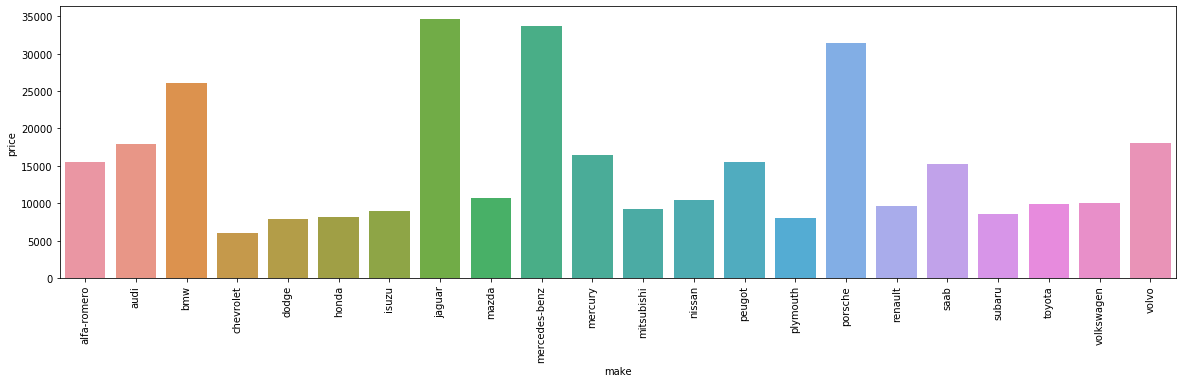

In [111]:
g = cars.groupby('make', as_index = False)['price'].mean()
plt.gcf().set_size_inches(20,5)
plt.xticks(rotation='vertical')
sns.barplot(g['make'], g['price'])

### Body-style

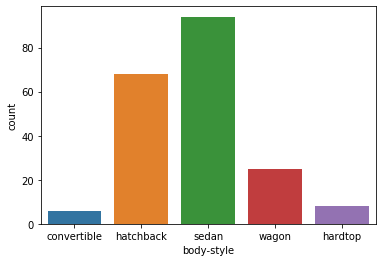

In [112]:
# Understand distribution of fuel-type
sns.countplot(cars['body-style'])

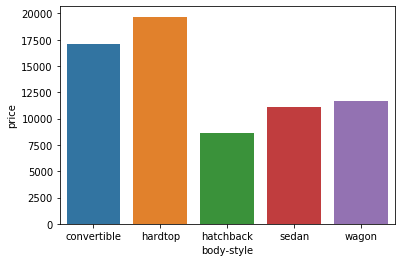

In [113]:
g = cars.groupby('body-style', as_index = False)['price'].median()
sns.barplot(g['body-style'], g['price'])

## num-of-doors

In [114]:
cars['num-of-doors'].value_counts()

four    113
two      86
?         2
Name: num-of-doors, dtype: int64

In [115]:
# Replace ? in no-of-doors with mode of no-of-doors
cars.loc[cars['num-of-doors'] == '?', 'num-of-doors'] = cars['num-of-doors'].mode()[0]

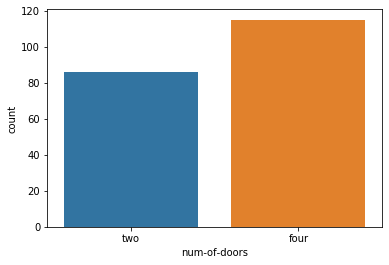

In [116]:
# Understand distribution of fuel-type
sns.countplot(cars['num-of-doors'])

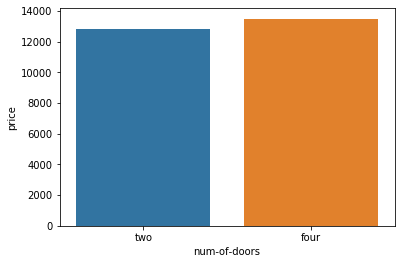

In [117]:
sns.barplot(x="num-of-doors", y="price", data = cars, ci = False)

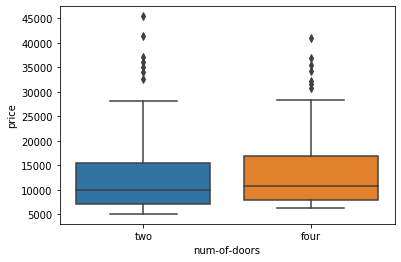

In [118]:
sns.boxplot(x="num-of-doors", y = "price", data = cars)

### drive-wheel

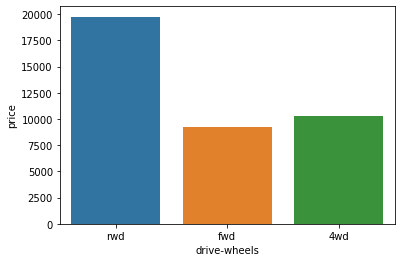

In [119]:
sns.barplot(x="drive-wheels", y='price', data=cars, ci= False)

### engine-size

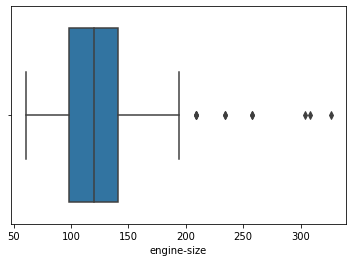

In [120]:
# Understand distribution of engine-size
sns.boxplot(cars['engine-size'])

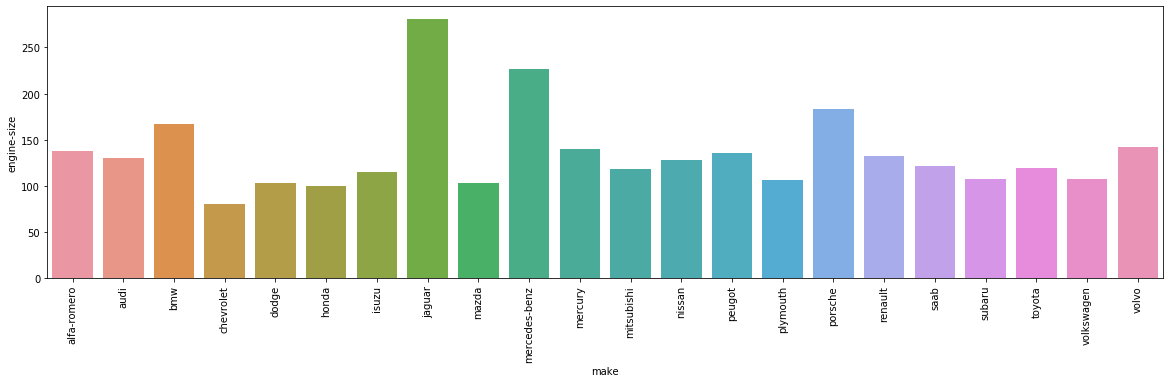

In [121]:
plt.gcf().set_size_inches(20,5)
plt.xticks(rotation='vertical')
sns.barplot(x='make',y='engine-size', data=cars, ci=False)

### city-mpg and highway-mpg

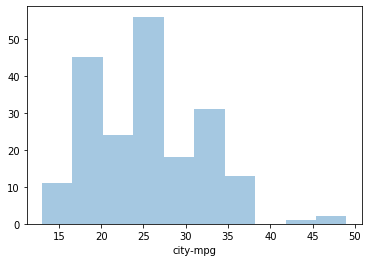

In [122]:
# Understand distribution of city-mpg
sns.distplot(cars['city-mpg'], hist=True, kde=False)

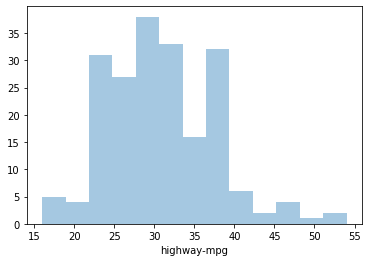

In [123]:
# Understand distribution of highway-mpg
sns.distplot(cars['highway-mpg'], kde=False)

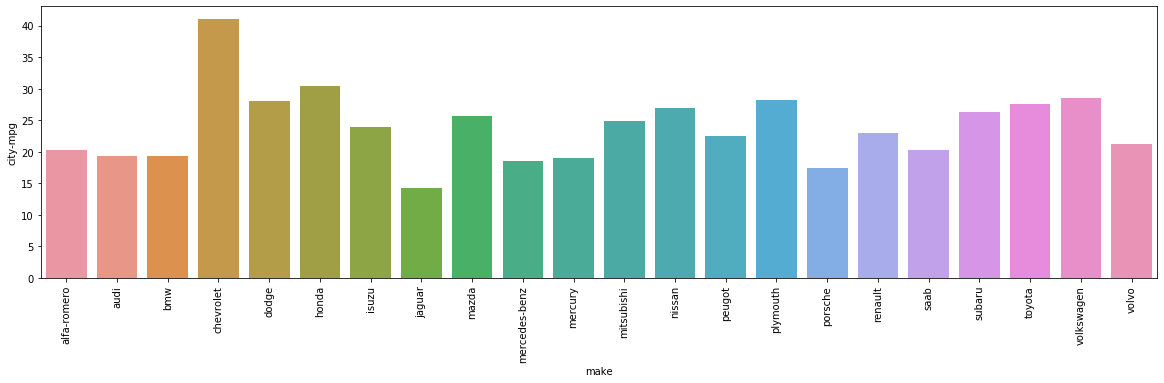

In [124]:
plt.gcf().set_size_inches(20,5)
plt.xticks(rotation='vertical')
sns.barplot(x='make', y = 'city-mpg', data = cars, ci=False)

### horse-power

In [125]:
# replace ? in horse-power with mean value in the same make 

In [126]:
hdf = cars.loc[ cars.horsepower != '?', ['make','horsepower']]

In [127]:
hdf['horsepower'] = hdf.horsepower.astype(np.int32)

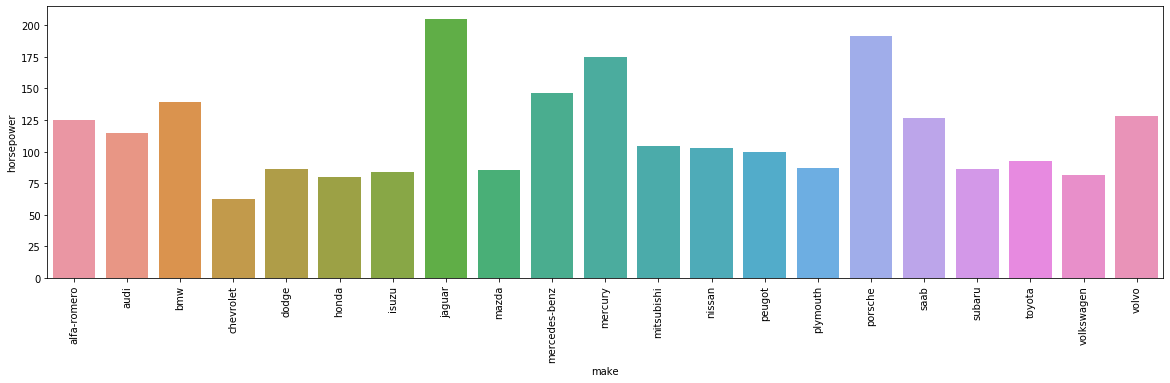

In [128]:
plt.gcf().set_size_inches(20,5)
plt.xticks(rotation='vertical')
sns.barplot(x ="make" , y='horsepower', data=hdf, ci= False)

In [129]:
# drop rows where horsepower == ?
cars.drop(index = cars.loc[cars['horsepower'] == '?'].index, inplace=True)

In [130]:
cars['horsepower'] = cars['horsepower'].astype(np.int)

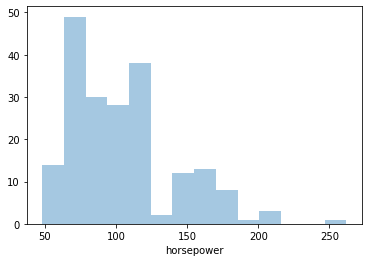

In [131]:
sns.distplot(cars.horsepower, kde=False)

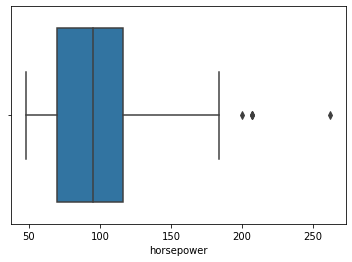

In [132]:
sns.boxplot(cars.horsepower)

In [133]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 199 entries, 0 to 204
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   make          199 non-null    object 
 1   fuel-type     199 non-null    object 
 2   num-of-doors  199 non-null    object 
 3   body-style    199 non-null    object 
 4   drive-wheels  199 non-null    object 
 5   length        199 non-null    float64
 6   width         199 non-null    float64
 7   curb-weight   199 non-null    int64  
 8   engine-size   199 non-null    int64  
 9   horsepower    199 non-null    int32  
 10  city-mpg      199 non-null    int64  
 11  highway-mpg   199 non-null    int64  
 12  price         199 non-null    float64
dtypes: float64(3), int32(1), int64(4), object(5)
memory usage: 21.0+ KB


In [134]:
cars.isin(["?"]).sum()

make            0
fuel-type       0
num-of-doors    0
body-style      0
drive-wheels    0
length          0
width           0
curb-weight     0
engine-size     0
horsepower      0
city-mpg        0
highway-mpg     0
price           0
dtype: int64

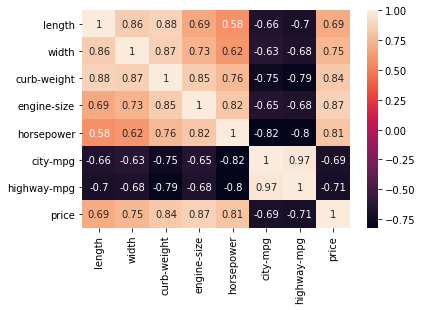

In [135]:
sns.heatmap(cars.corr(), annot=True)

In [136]:
## Compare city-mpg and highway-mpg for each make 
g = cars.groupby('make', as_index=False)['city-mpg','highway-mpg'].mean()

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20]),
 <a list of 21 Text xticklabel objects>)

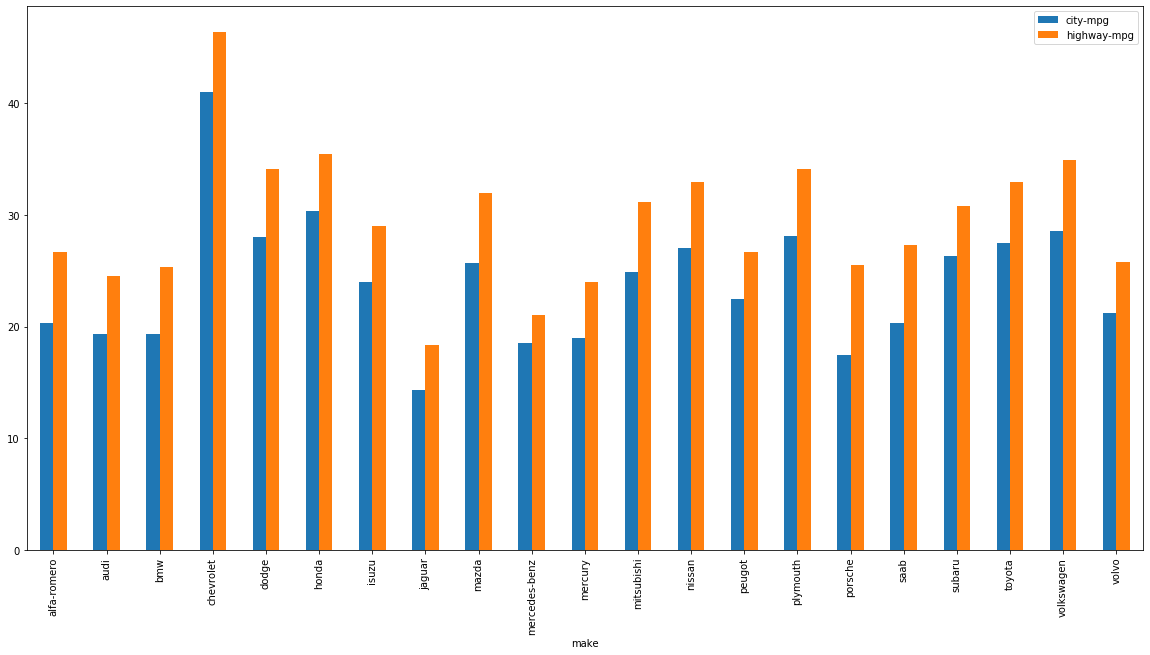

In [137]:
## Compare city-mpg and highway-mpg for each make  with bar graph
g.plot(x='make',kind='bar')
plt.gcf().set_size_inches(20,10)
plt.xticks(rotation='vertical')

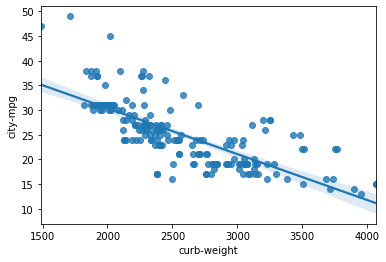

In [138]:
sns.regplot(x="curb-weight", y = "city-mpg", data=cars)

In [139]:
## Compare engsize and horsepower for each make 
g = cars.groupby('make', as_index=False)['engine-size','horsepower'].mean()

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20]),
 <a list of 21 Text xticklabel objects>)

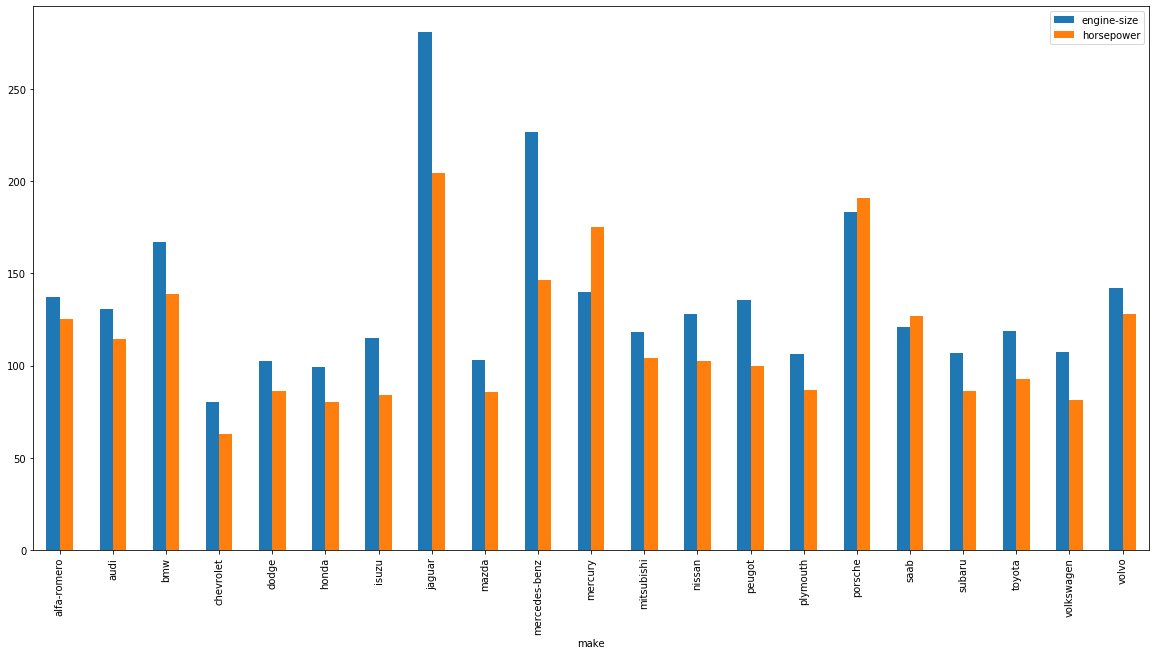

In [140]:
## Compare city-mpg and highway-mpg for each make  with bar graph
g.plot(x='make',kind='bar')
plt.gcf().set_size_inches(20,10)
plt.xticks(rotation='vertical')

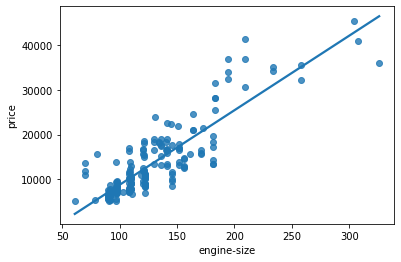

In [141]:
# Compare Engine size with price 
sns.regplot(x ="engine-size", y = 'price', data = cars,ci=False)

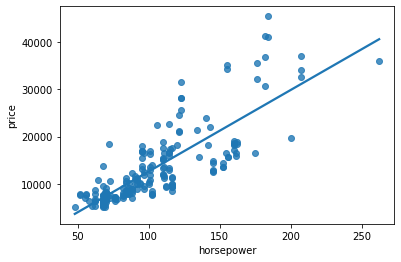

In [142]:
# Compare horsepower with price 
sns.regplot(x ="horsepower", y = 'price', data = cars,ci=False)

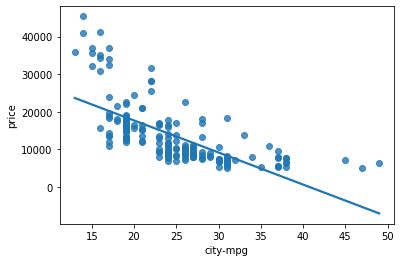

In [143]:
# Compare city-mpg with price 
sns.regplot(x ="city-mpg", y = 'price', data = cars, ci = False)

## Save final DF

In [144]:
# drop make
cars.drop(columns=['make','highway-mpg'],axis=1,inplace=True)

In [145]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 199 entries, 0 to 204
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   fuel-type     199 non-null    object 
 1   num-of-doors  199 non-null    object 
 2   body-style    199 non-null    object 
 3   drive-wheels  199 non-null    object 
 4   length        199 non-null    float64
 5   width         199 non-null    float64
 6   curb-weight   199 non-null    int64  
 7   engine-size   199 non-null    int64  
 8   horsepower    199 non-null    int32  
 9   city-mpg      199 non-null    int64  
 10  price         199 non-null    float64
dtypes: float64(3), int32(1), int64(3), object(4)
memory usage: 17.9+ KB


In [146]:
#Convert categorical variables to dummies
cars = pd.get_dummies(cars)

In [147]:
cars.columns

Index(['length', 'width', 'curb-weight', 'engine-size', 'horsepower',
       'city-mpg', 'price', 'fuel-type_diesel', 'fuel-type_gas',
       'num-of-doors_four', 'num-of-doors_two', 'body-style_convertible',
       'body-style_hardtop', 'body-style_hatchback', 'body-style_sedan',
       'body-style_wagon', 'drive-wheels_4wd', 'drive-wheels_fwd',
       'drive-wheels_rwd'],
      dtype='object')

In [148]:
cars.shape

(199, 19)

In [149]:
cars.to_csv("final_cars.csv",index=False)